<a href="https://colab.research.google.com/github/abhishekmulik/LP5/blob/main/DL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#importing required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Boston Housing dataset
data = pd.read_csv('./HousingData.csv')

In [3]:
# Check for missing values
print(data.isnull().sum())

# Replace missing values with mean
data.fillna(data.mean(), inplace=True)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


<Axes: >

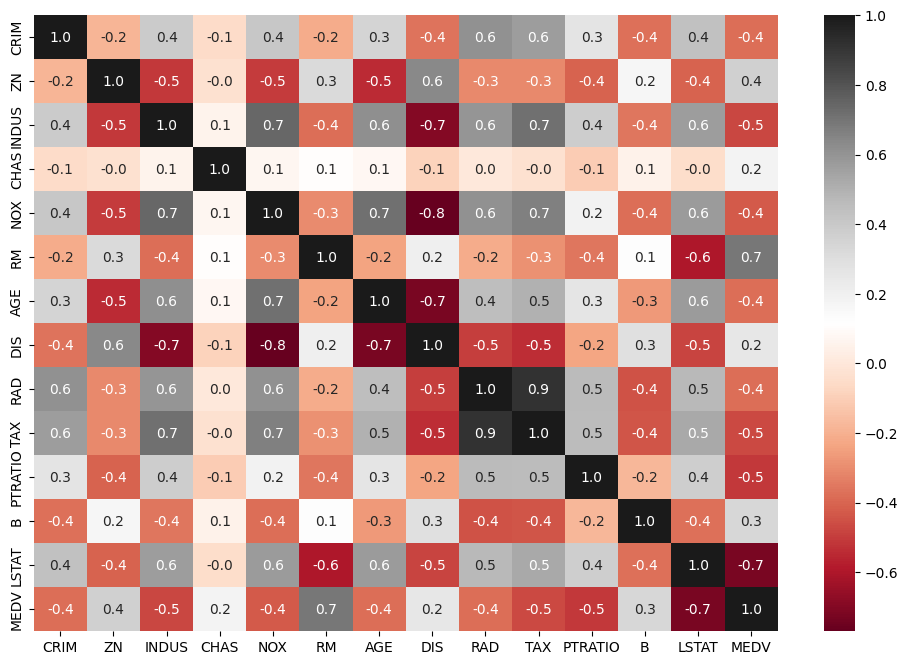

In [17]:
data.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(),cmap = 'RdGy', annot = True, fmt = '.1f')

In [4]:
# Split the data into features and target
x = data.drop('MEDV', axis=1).values
y = data['MEDV'].values.reshape(-1, 1)

In [5]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# Scale the features using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)



In [7]:
# Define the deep neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [8]:
# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

In [9]:
#Define callbacks
early_stopping  = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights = True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)

In [20]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32,callbacks = [early_stopping,lr_scheduler],validation_split = 0.20,verbose=1)

Epoch 1/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0426 - val_loss: 0.1231 - lr: 0.0012
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0385 - val_loss: 0.1244 - lr: 0.0012
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0362 - val_loss: 0.1160 - lr: 0.0012
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0356 - val_loss: 0.1206 - lr: 0.0012
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0350 - val_loss: 0.1171 - lr: 0.0012
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0345 - val_loss: 0.1153 - lr: 0.0012
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0346 - val_loss: 0.1132 - lr: 0.0012
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0347 - val_loss: 0.1133 - lr: 0.0012
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0348 - val_loss: 0.1132 - lr:

In [22]:
# Evaluate the model on the test set
mse = model.evaluate(x_test, y_test)
print(f'MSE: {mse:.4f}')

4/4 [==============================] - 0s 3ms/step - loss: 529.7974
MSE: 529.7974


In [12]:
# Make predictions on the test set
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [23]:
# Unscale the data
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

In [24]:
#print first 10 predictions prices
print('Predicted Prices:\n',y_pred[:10])

Predicted Prices:
 [[274.77368]
 [383.0735 ]
 [181.15689]
 [240.8597 ]
 [176.71939]
 [221.68292]
 [202.03722]
 [159.20781]
 [218.72672]
 [205.07521]]
